# Eveluation and further visulizatoin
of the optimized models (lr, SVC, RF) using rolling data. This time we redo the grid search only on the trainig set to be consistent to the models buit from the other two data representations.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

## LR
The gridsearch is executed by grid_lr.py and submit.sh using cluster (no dask involved). The number of searched models is 2 (with or without PCA) * 10 (lr__C) * 5 (cv) = 100. It takes 4 minutes to finish the gridsearch. The best model is with PCA and stored as roll_lr_model_20210525.joblib. The job log is slurm-53025.txt. 

In [2]:
lr_df = pd.read_csv('results/roll_lr_grid_20210525.csv', index_col=0)

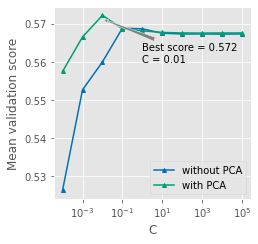

In [5]:
fig = plt.figure(figsize = (3.54, 3.54))

data_df = lr_df.copy()
x_col = 'param_lr__C'
max_index = np.argmax(data_df.mean_test_score)
plt.xscale('log')
#plt.ylim(0.545, 0.595)
#plt.yticks(np.linspace(0.56, 0.59, 4))

for label, mask in zip(['without PCA', 'with PCA'], [data_df.param_pca != 'PCA(whiten=True)', data_df.param_pca == 'PCA(whiten=True)']):
    xx = data_df.loc[mask, x_col].values.astype(float)
    yy = data_df.loc[mask, 'mean_test_score'].values.astype(float)
    plt.plot(xx, yy, marker = '^', ms = 4, label = label)

plt.ylabel('Mean validation score')
plt.xlabel('C')
plt.legend()

plt.annotate(text = 'Best score = {:.3f}\nC = {}'.format(data_df.mean_test_score[max_index], data_df.loc[max_index, x_col]),
             xy = (data_df.loc[max_index, x_col], data_df.mean_test_score[max_index]-.001),
             xytext = (1, 0.56), arrowprops=dict(facecolor='gray', arrowstyle = 'fancy')
            )
fig.subplots_adjust(wspace = 0.05)
fig.savefig('results/roll_lr_grid_combined_{}.png'.format(date))

## RBF SVM
The gridsearch is executed by grid_svc.py and submit_svc.sh using cluster (no dask involved). The number of searched models is 2 (with or without PCA) * 8 (svc__gamma) * 7 (svc__C) * 5 (cv) = 560. It takes more than 30 hours to finish the gridsearch. The best model is with PCA and stored as roll_svc_model_20210524.joblib. The job log is slurm-53004.txt. 

In [2]:
svc_df = pd.read_csv('results/roll_svc_grid_20210524.csv', index_col = 0)
len(svc_df)

112

In [3]:
svc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca,param_scaling,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3747.577237,214.993579,168.193949,31.478353,PCA(whiten=True),StandardScaler(),0.001,0.000001,"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,100
1,3925.248119,396.550951,150.924572,21.433284,PCA(whiten=True),StandardScaler(),0.001,0.000010,"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,100
2,3917.582920,108.878549,153.838933,10.808932,PCA(whiten=True),StandardScaler(),0.001,0.000100,"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,100
3,3851.770840,435.596086,159.981282,21.539149,PCA(whiten=True),StandardScaler(),0.001,0.001000,"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,100
4,3612.414306,474.339901,135.479461,9.882891,PCA(whiten=True),StandardScaler(),0.001,0.010000,"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.492280,0.461430,0.418216,0.442898,0.467305,0.456426,0.024787,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,474.279682,68.589210,83.712051,8.053401,NaN,StandardScaler(),10000.000,0.000100,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.568123,0.567113,0.534925,0.543792,0.570907,0.556972,0.014705,29
108,753.056472,58.649657,28.556863,6.317446,NaN,StandardScaler(),10000.000,0.001000,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.547615,0.581805,0.540644,0.501194,0.559060,0.546064,0.026425,43
109,1216.705648,134.350031,11.340886,0.338639,NaN,StandardScaler(),10000.000,0.010000,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.517192,0.579661,0.512709,0.481658,0.552342,0.528712,0.033932,52
110,367.386970,84.226620,10.605166,1.969558,NaN,StandardScaler(),10000.000,0.100000,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.491402,0.553409,0.471043,0.475744,0.538801,0.506080,0.033687,59


In [4]:
np.max(svc_df.mean_test_score.astype(float))

0.5731954982814058

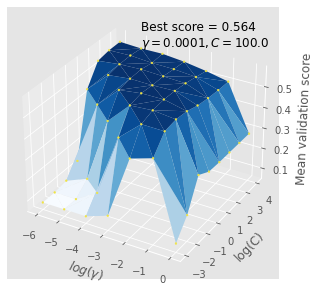

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-2, -2, .88, text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_svc_grid_{}.png'.format(date))

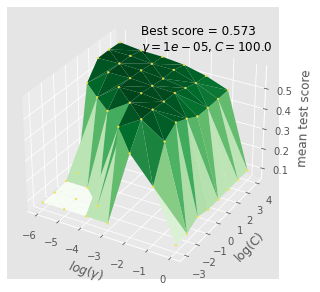

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 3, alpha = 1)
# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-2, -2, .88,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, arrow_length_ratio=0.1, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('mean test score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_svc+pca_grid_{}.png'.format(date))

## Why the the optimal model is different?
I thought the scores in training and dev sets should be the same as the model retrained (ML_element_08.ipynb) using the optimal parameter provided by the CV on both training and dev sets (ML_element_05.ipynb, main workflow before reading Andrew Ng's book). But they are not and the optimal parameters are not either. I check the scripts (grid_svc.py and build_trainn_svc.py). The only difference I found is the use of my_group_stratify_shuffle and my_train_test_split, which shouldn't be the cause., so I check if they produce different indices.

In [6]:
import pandas as pd
from split import *
data_df = pd.read_csv('data/XRF_ML_cr.csv')
X = data_df.iloc[:, 1:-2].values
y = data_df['facies_merge_2'].values
groups = data_df['core_section'].values

train_idx, test_idx = my_train_test_split(y, groups)
X_train = X[train_idx]
y_train = y[train_idx]
groups_train = groups[train_idx]

# This time I split the training set again to obtain dev set
trainn_idx, dev_idx = my_group_stratify_shuffle(X_train, y_train, groups_train)
trainn_idxx, dev_idxx = my_train_test_split(y_train, groups_train)

In [7]:
print((trainn_idx == trainn_idxx).sum(), len(trainn_idx))

109262 109262


The indices are the same, no matter using my_group_stratify_shuffle or my_train_test_split. 

## RandomForest (RF)
The gridsearch is implemented by grid_rf.py and submit.sh using cluster (no dask involved). Three amounts of n_estimators (100 (default), 1000, 5000) are searched. RF really comsumes a lot memory surign computation. The number of searched models is 2 (with or without PCA) * 3 (rf__n_estimators) * 3 (rf__max_depth) * 5 (cv) = 90. It takes 3.8 hours to finish the gridsearch. The best model is without PCA and stored as roll_rf_model_20210525.joblib (778 MB). The job log is slurm-53024.txt.

Usually, n_estimators is the more the better generalization because it provides more regularization strength. However, the more n_estimators means more computation and memery loading. Although the 5000 n_estimators seems not reach the peak of rising trend and we might find some ways to solve the memory limit of cluster, I don't think it's sensible to persuit the higher n_estimators because the model's size will be too big for later applications.

In [2]:
rf_df = pd.read_csv('results/roll_rf_grid_20210525.csv', index_col = 0)

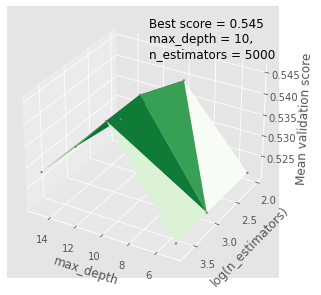

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9) # with PCA
fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .545,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

#ax.set_zticks(np.linspace(0.47, 0.51, 5))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)
fig.savefig('results/roll_pca+rf_grid_{}.png'.format(date))

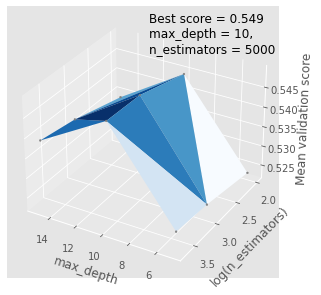

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9,18) # without PCA
fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .55,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

#ax.set_zticks(np.linspace(0.515, 0.525, 3))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)

fig.savefig('results/roll_rf_grid_{}.png'.format(date))

Actually, for RF, with or without PCA are similar.

## Produce matrices
The functions are adopted from ML_element_12.ipynb.

In [11]:
# read the results produced by script directly
y_df = pd.read_csv('results/roll_dev_y.csv', index_col=0)
y_df.shape

(21608, 5)

In [12]:
from sklearn.metrics import balanced_accuracy_score as score
for col in ['y_lr', 'y_svc', 'y_rf']:
    print('Balanced score of {}: {:.2f}'.format(col, score(y_true=y_df.y, y_pred=y_df[col])))

Balanced score of y_lr: 0.60
Balanced score of y_svc: 0.63
Balanced score of y_rf: 0.62


In [13]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

Facies

['Shoreface',
 'Channel',
 'Beach-foreshore',
 'Sand flat',
 'Mud flat',
 'Lagoon',
 'Peat',
 'Soil',
 'Eolian/fluvial (w)',
 'Shallow marine',
 'Moraine',
 'Eolian/fluvial']

In [15]:
def plot_recall(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test)
    """
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import balanced_accuracy_score as score

    for col in y_preds:
        # make confusion matrix between prediction and actual labels
        confusion = confusion_matrix(data_df.y, data_df[col])
        model_name = col[2:]
        con_df = pd.DataFrame(confusion, index = Facies, columns = Facies)
        #con_df.to_csv('results/roll_confusion_{}_{}.csv'.format(model_name, date))

        # normalize the counts ineach row and present in percent
        x = np.copy(confusion).astype(float)
        x /= x.sum(axis = 1, keepdims = True)
        con_per = pd.DataFrame((x*100).astype(int), index = Facies, columns = Facies)
        #con_per.to_csv('results/roll_recall_%_{}_{}.csv'.format(model_name, date))

        # Plot the matrix
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(con_per, annot = con_per.astype(str), ax = ax, cmap = 'GnBu', square = True, vmin=0, vmax=100,
                    xticklabels = con_per.index, yticklabels = con_per.columns, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Data percentage in each row'}
                   )

        ax.set_xlabel('Prediction (accuracy: {:.2f})'.format(score(y_true=data_df.y, y_pred=data_df[col])), size = 14)
        ax.set_ylabel('Actual facies', size = 14)
        fig.savefig('results/roll_{}_recall_%_{}_{}.png'.format(split, model_name, date))

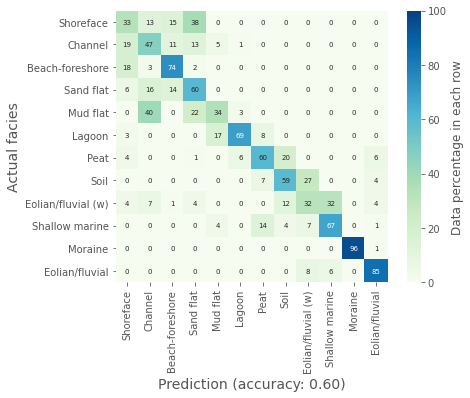

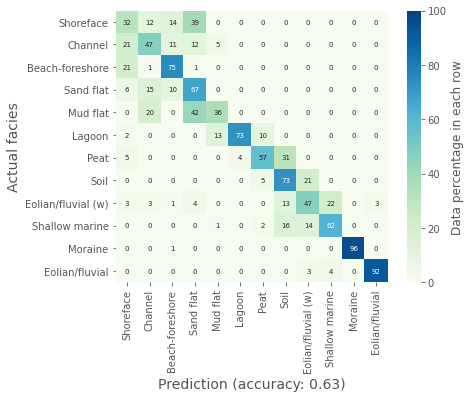

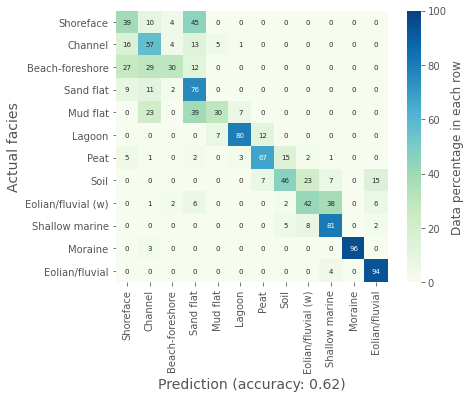

In [16]:
plot_recall(y_df, ['y_lr', 'y_svc', 'y_rf'], Facies, 'dev')

In [17]:
def detect_conjuction(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test).
    """
    
    data_df['id'] = range(len(data_df))
    mat_dict = {}


    for y_pred in y_preds:
        y_mean = []
        composite_id = []
        model_name = y_pred[2:] if len(y_pred)>1 else 'description'
        
        for section in np.unique(data_df.core_section):
            y_mean = np.hstack((y_mean, data_df.loc[data_df.core_section == section, y_pred].rolling(window = 2).mean()))
            composite_id = np.hstack((composite_id, data_df[data_df.core_section == section].index))

        # merge the rolling with the original label
        # this will lost the first data poit in each section, but it doesn't mater
        # because the boundary shouldn't be at the begining of each section
        tmp_df = pd.concat([data_df, pd.DataFrame({'y_mean': y_mean}, index = composite_id).dropna()], join = 'inner', axis = 1)

        # if y_pred is not same as y_mean, it means there is a boundary (facies change) between this and above depth
        bd_df = tmp_df[tmp_df[y_pred] != tmp_df.y_mean].copy()
        bd_df['ab_id'] = bd_df.id - 1
        if len(model_name) > 3:
            print('There are {} boundaries in description.'.format(len(bd_df)))
        else:
            print('There are {} boundaries in the optimized {} model\'s predictions.'.format(len(bd_df), model_name))

        # build matrix of boundaries
        bd_mat = np.zeros(shape = (12, 12), dtype = int)

        for row in bd_df.iterrows():
            tmp = np.zeros(shape = (12, 12), dtype = int)
            tmp[data_df[y_pred][int(row[1].ab_id)], data_df[y_pred][int(row[1].id)]] = 1
            bd_mat += tmp
            
        mat_dict[y_pred] = bd_mat
        
        # plot
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(bd_mat, annot = bd_mat.astype(str), ax = ax, cmap = 'Greens', square = True, #vmin=0, vmax=130,
                    xticklabels = Facies, yticklabels = Facies, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Counts (total: {})'.format(len(bd_df))}
                   )
        ax.set_xlabel('Below facies', size = 16)
        ax.set_ylabel('Above facies', size = 16)
        fig.savefig('results/roll_{}_conjunction_matrix_{}_{}.png'.format(split, model_name, date))
    
    return mat_dict

There are 1536 boundaries in the optimized lr model's predictions.
There are 1337 boundaries in the optimized svc model's predictions.
There are 804 boundaries in the optimized rf model's predictions.


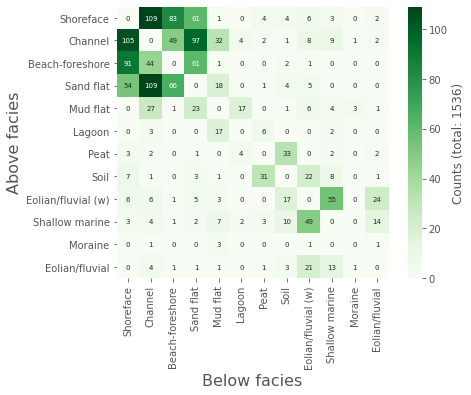

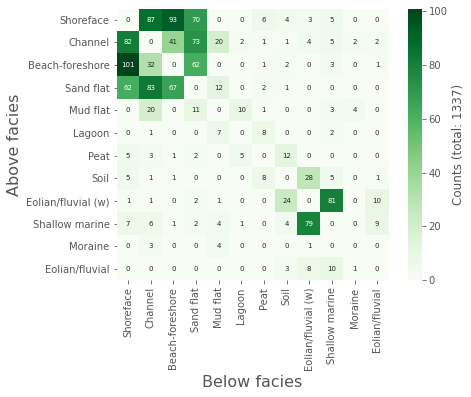

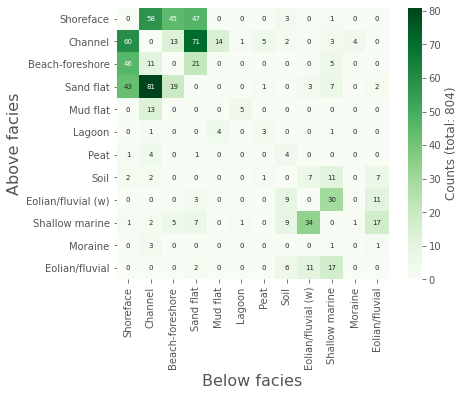

In [18]:
mat_dict = detect_conjuction(y_df,  ['y_lr', 'y_svc', 'y_rf'], Facies, 'dev')

## Comparision
After including the rolling and image-like models (ML_element_12.ipynb), whcih use only the training set, the best model is still the rolling model (SVC), which gives 0.62 balanced score on dev set and 0.57 CV score (this notebook). Comparing to the image-like model, the rolling model gives a slightly better error rate and fewer boundaries (0.46 -> 0.43, 1445 -> 1337). The rolling trick gives better performance for model but not as significantly as we saw in ML_element_10.ipynb. Therefore, including the dev set to the training set changes the data characterisitic and gives CV to find different optimal parameters. 